In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv("/content/drive/My Drive/Research/Fake_News_Detection/Bangla Fake News/final_bn_data.csv")
df

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0
...,...,...,...,...
14532,National,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শ-ডাকাত বন্দুকযু‌দ্ধে ন...,বান্দরবা‌নের নাইক্ষ্যংছ‌ড়ি উপজেলায় পু‌লি‌শের স...,0.0
14533,Crime,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ ৪ জনকে জিজ্...,নিজস্ব প্রতিবেদক : সিটিসেলের নামে ৩৮৩ কোটি টাক...,1.0
14534,Education,পরীক্ষা বাতিল হওয়ায় ১ম -৩য় শ্রেণীতে ভর্তি হতে ...,১-৩ শ্রেনী পর্যন্ত পরীক্ষা বাতিলের কথা শুনে দে...,0.0
14535,Sports,এশিয়া কাপে আজ ভারত-পাকিস্তানের মহারণ,আজ এশিয়া কাপের সবচেয়ে আকর্ষণীয় ম্যাচে ভারতের ম...,0.0


In [5]:
df.isnull().sum()

category    0
headline    0
content     0
label       0
dtype: int64

In [6]:
# check class distribution
df['label'].value_counts(normalize = True)

label
1.0    0.6879
0.0    0.3121
Name: proportion, dtype: float64

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [8]:
#merging the news headline and title
df['content_data'] = df['headline']+' '+df['content']

In [9]:
!pip install stemming
from stemming.porter2 import stem
df['content_data'] = df['content_data'].apply(stem)

  Preparing metadata (setup.py) ... done
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11123 sha256=3c913db7e0b20e030b3bafaf34575974a3302e4a43a6446568b41151fbe9dc28
  Stored in directory: /root/.cache/pip/wheels/c5/f9/3f/8fe1ec182ce66145d7ded39bad9a690960469dc350fbec0181
Successfully built stemming


In [10]:
X=df['content_data']
Y=df['label']

In [11]:
#TfIDF Vectorizer Bi-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
XV_Bi_gram = vectorizer.fit_transform(X)


In [12]:
XV_Bi_gram

<14537x474742 sparse matrix of type '<class 'numpy.float64'>'
	with 2478144 stored elements in Compressed Sparse Row format>

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

**Support Vector Machine(SVM)**

Fold: 0 0.7168729940394315
              precision    recall  f1-score   support

           0       0.60      0.18      0.28      1312
           1       0.73      0.95      0.82      3050

    accuracy                           0.72      4362
   macro avg       0.66      0.56      0.55      4362
weighted avg       0.69      0.72      0.66      4362

Fold: 1 0.6983035304906007
              precision    recall  f1-score   support

           0       0.60      0.17      0.26      1393
           1       0.71      0.95      0.81      2969

    accuracy                           0.70      4362
   macro avg       0.65      0.56      0.54      4362
weighted avg       0.67      0.70      0.64      4362

Fold: 2 0.7097661623108665
              precision    recall  f1-score   support

           0       0.60      0.16      0.26      1337
           1       0.72      0.95      0.82      3025

    accuracy                           0.71      4362
   macro avg       0.66      0.56      0.54    

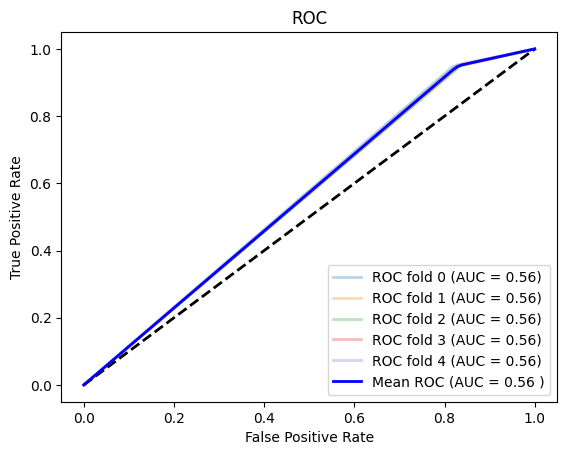

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
SVM_clf = SVC()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(XV_Bi_gram, Y, test_size=0.30, random_state=i)
  # Train the classifier
  SVM_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = SVM_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 233 1123]
 [ 141 2865]]


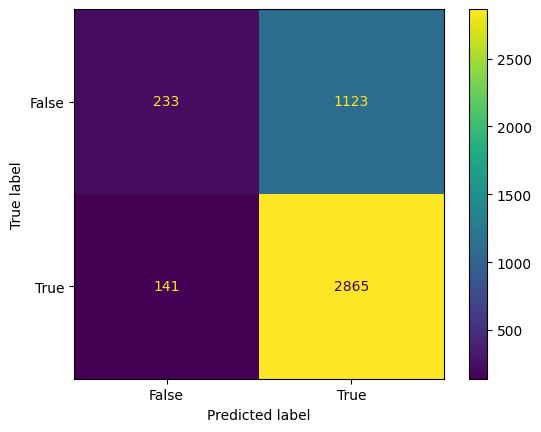

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, SVM_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the Random Forest classifier
rf_clf = RandomForestClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(XV_Bi_gram, Y, test_size=0.30, random_state=i)
  # Train the classifier
  rf_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = rf_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Fold: 0 : 0.7336084364970197
              precision    recall  f1-score   support

           0       0.64      0.27      0.38      1312
           1       0.75      0.93      0.83      3050

    accuracy                           0.73      4362
   macro avg       0.69      0.60      0.60      4362
weighted avg       0.71      0.73      0.69      4362

Fold: 1 : 0.7150389729481889
              precision    recall  f1-score   support

           0       0.64      0.24      0.35      1393
           1       0.72      0.94      0.82      2969

    accuracy                           0.72      4362
   macro avg       0.68      0.59      0.58      4362
weighted avg       0.70      0.72      0.67      4362

Fold: 2 : 0.7255845942228336
              precision    recall  f1-score   support

           0       0.64      0.24      0.35      1337
           1       0.74      0.94      0.83      3025

    accuracy                           0.73      4362
   macro avg       0.69      0.59      0.

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, rf_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Decision Tree(DT)**

Fold: 0 : 0.6948647409445209
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1312
           1       0.78      0.79      0.78      3050

    accuracy                           0.69      4362
   macro avg       0.63      0.63      0.63      4362
weighted avg       0.69      0.69      0.69      4362

Fold: 1 : 0.6843191196698762
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1393
           1       0.76      0.78      0.77      2969

    accuracy                           0.68      4362
   macro avg       0.63      0.63      0.63      4362
weighted avg       0.68      0.68      0.68      4362

Fold: 2 : 0.6834021091242549
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1337
           1       0.77      0.77      0.77      3025

    accuracy                           0.68      4362
   macro avg       0.63      0.63      0.

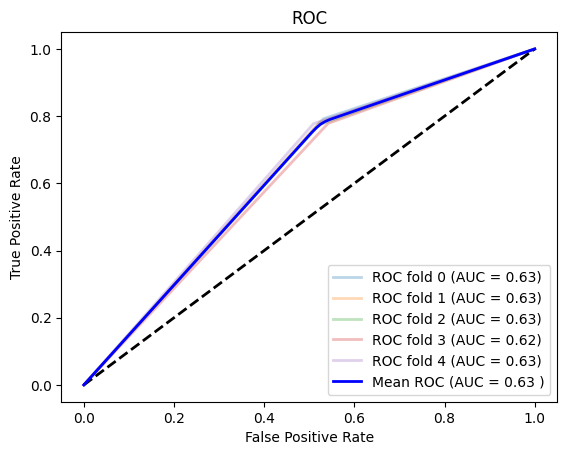

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create the Random Forest classifier
dt_clf = DecisionTreeClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(XV_Bi_gram, Y, test_size=0.30, random_state=i)
  # Train the classifier
  dt_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = dt_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 665  691]
 [ 668 2338]]


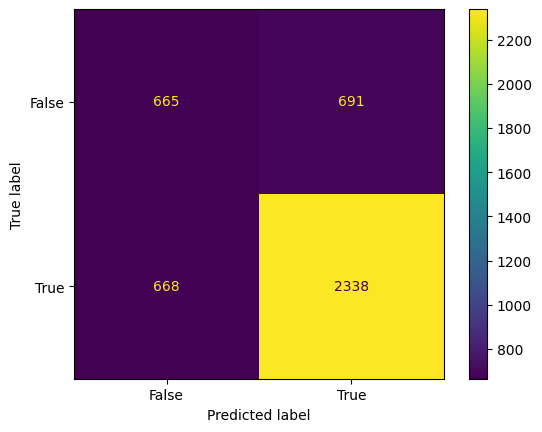

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
NB_clf = GaussianNB()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(XV_Bi_gram, Y, test_size=0.30, random_state=i)

  # Convert sparse matrices to dense matrices
  x_train = x_train.toarray()
  x_test = x_test.toarray()

  # Train the classifier
  NB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = NB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

NameError: name 'train_test_split' is not defined

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
#Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=0)

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  GB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = GB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

**Grid Search(GS)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(XV_Bi_gram, Y, test_size=0.30, random_state=i)

  # Convert sparse matrices to dense matrices
  #x_train = x_train.toarray()
  #x_test = x_test.toarray()

  # Train the classifier
  grid_search.fit(x_train, y_train)
  # Make predictions
  y_pred = grid_search.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

